In [16]:
import pandas as pd

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

from statistics import mean

### Open csv

In [13]:
data = pd.read_csv('train.csv')
data.size, data.describe(), data.head()

(10692,        PassengerId    Survived      Pclass         Age       SibSp  \
 count   891.000000  891.000000  891.000000  714.000000  891.000000   
 mean    446.000000    0.383838    2.308642   29.699118    0.523008   
 std     257.353842    0.486592    0.836071   14.526497    1.102743   
 min       1.000000    0.000000    1.000000    0.420000    0.000000   
 25%     223.500000    0.000000    2.000000   20.125000    0.000000   
 50%     446.000000    0.000000    3.000000   28.000000    0.000000   
 75%     668.500000    1.000000    3.000000   38.000000    1.000000   
 max     891.000000    1.000000    3.000000   80.000000    8.000000   
 
             Parch        Fare  
 count  891.000000  891.000000  
 mean     0.381594   32.204208  
 std      0.806057   49.693429  
 min      0.000000    0.000000  
 25%      0.000000    7.910400  
 50%      0.000000   14.454200  
 75%      0.000000   31.000000  
 max      6.000000  512.329200  ,    PassengerId  Survived  Pclass  \
 0            1   

### Create X(set of features) and y(target variable)

In [22]:
data.dropna(axis = 0, subset = ['Survived'], inplace = True)
y = data.Survived
X = data.drop(['PassengerId', 'Survived', 'Name'], axis=1)

## Imputation and Label Encoding

In [29]:
imputed_X_plus = X.copy()
cols_with_missing = (col for col in X.columns if X[col].isnull().any())
for col in cols_with_missing:
    print(col + ' was missing a value')
    if data[col].dtype == 'object':
        data[col].fillna("NaN")
        continue
    imputed_X_plus[col + '_was_missing'] = imputed_X_plus[col].isnull()
le = LabelEncoder()
le_sex = le.fit_transform(data.Sex)
le_ticket = le.fit_transform(data.Ticket)
# le_cabin = le.fit_transform(data.Cabin)
# le_embarked = le.fit_transform(data.Embarked)
my_imputer = SimpleImputer()
imputed_X_plus = my_imputer.fit_transform(imputed_X_plus)

Age was missing a value
Cabin was missing a value
Embarked was missing a value


AttributeError: 'DataFrame' object has no attribute 'dtype'

Age was missing a value


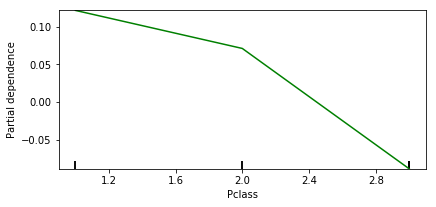

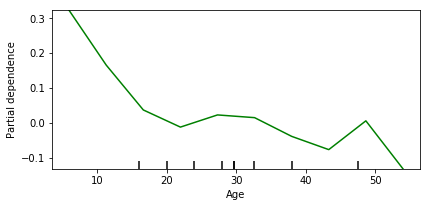

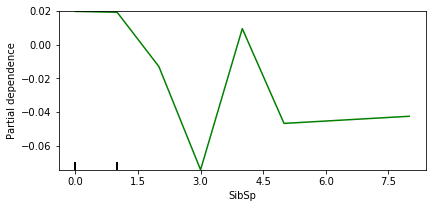

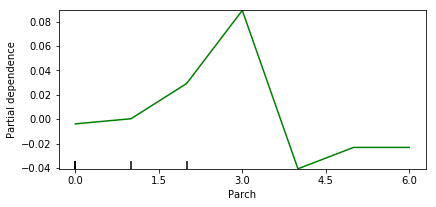

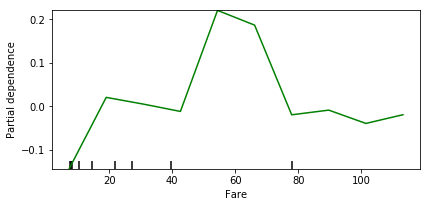

In [18]:
cols = X.columns
my_model = GradientBoostingRegressor()
my_model.fit(imputed_X_plus, y)
for _ in range(len(cols)):
    my_plots = plot_partial_dependence(my_model, features = [_], X = imputed_X_plus, feature_names = cols,
                                       grid_resolution = 10)